In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir = r"/content/drive/MyDrive/Fish Classification Data/Data"

In [ ]:
os.listdir(base_dir)

['CRABS',
 'OYSTERS',
 'starfish',
 'Mussel',
 'Finfish',
 'Shrimp',
 'Seacucumber',
 'Lobster']

In [ ]:
IMAGE_SIZE=224
BATCH_SIZE=64

In [ ]:
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
    )

test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
     validation_split=0.1
)

train_datagen=train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)

test_datagen=test_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 2807 images belonging to 8 classes.
Found 308 images belonging to 8 classes.


In [ ]:
Data = tf.keras.utils.image_dataset_from_directory(base_dir)

Found 3115 files belonging to 8 classes.


In [ ]:
data_iterator = Data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
batch=train_datagen.next()

In [ ]:
batch[0].shape

(64, 224, 224, 3)

In [ ]:
batch[1]

array([[0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


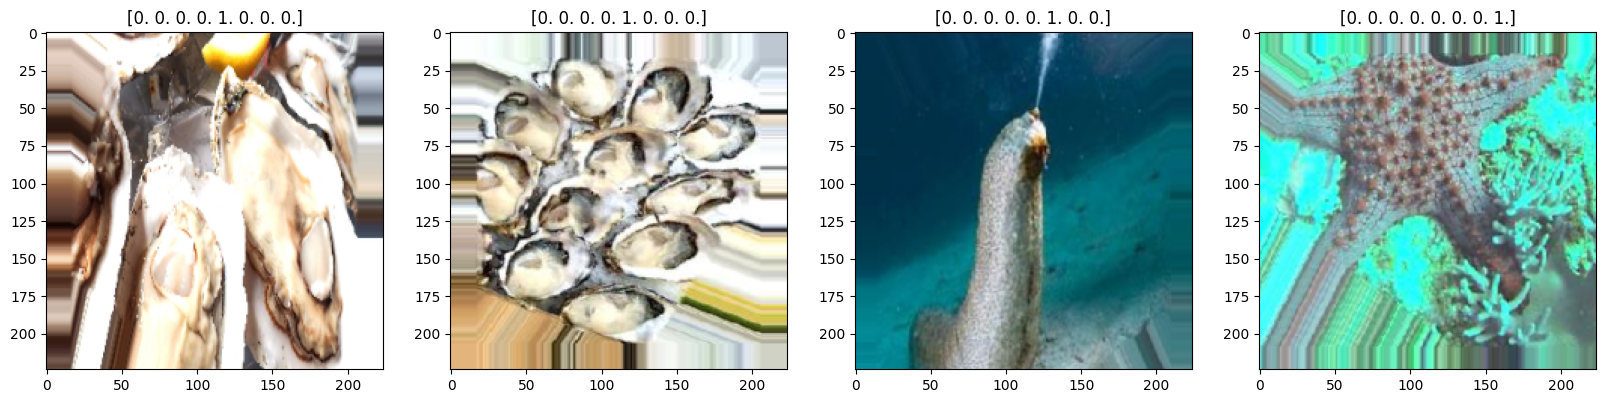

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(224, activation='relu'))
model.add(Dense(8, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_datagen,
                    epochs=100,
                    validation_data=test_datagen)

Epoch 1/100
44/44 [==============================] - 1356s 31s/step - loss: 2.0285 - accuracy: 0.2262 - val_loss: 1.6631 - val_accuracy: 0.3506
Epoch 2/100
44/44 [==============================] - 52s 1s/step - loss: 1.5831 - accuracy: 0.4076 - val_loss: 1.4350 - val_accuracy: 0.4643
Epoch 3/100
44/44 [==============================] - 53s 1s/step - loss: 1.3398 - accuracy: 0.4952 - val_loss: 1.1858 - val_accuracy: 0.5617
Epoch 4/100
44/44 [==============================] - 51s 1s/step - loss: 1.1422 - accuracy: 0.5835 - val_loss: 1.3725 - val_accuracy: 0.5227
Epoch 5/100
44/44 [==============================] - 51s 1s/step - loss: 1.0162 - accuracy: 0.6320 - val_loss: 0.9393 - val_accuracy: 0.6591
Epoch 6/100
44/44 [==============================] - 52s 1s/step - loss: 0.9113 - accuracy: 0.6719 - val_loss: 1.0474 - val_accuracy: 0.6494
Epoch 7/100
44/44 [==============================] - 50s 1s/step - loss: 0.7995 - accuracy: 0.7225 - val_loss: 0.8316 - val_accuracy: 0.6916
Epoch 8/10

In [ ]:
test_loss, test_acc = model.evaluate(test_datagen)
print('Test accuracy:', test_acc)

5/5 [==============================] - 2s 305ms/step - loss: 0.5035 - accuracy: 0.9026
Test accuracy: 0.9025974273681641


In [ ]:
x_test, y_test = test_datagen.next()

In [ ]:
y_pred = model.predict(x_test)

2/2 [==============================] - 1s 13ms/step


In [ ]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [ ]:
y_test_classes = np.argmax(y_test, axis=1)

In [ ]:
print("True labels: ", y_test_classes[:10])
print("Predicted labels: ", y_pred_classes[:10])

True labels:  [5 0 5 3 5 1 5 7 4 5]
Predicted labels:  [5 0 5 3 5 1 5 7 3 5]


In [ ]:
class_labels = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
class_names = np.array(['CRABS',
 'Finfish',
 'Lobster',
 'Mussel',
 'OYSTERS',
 'Seacucumber',
 'Shrimp',
 'starfish'])

In [ ]:
def display_images(images, labels, predicted_labels):
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    axes = axes.ravel()
    for i in np.arange(0, 10):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title("True: {}\nPredicted: {}".format(class_names[labels[i]], class_names[predicted_labels[i]]))
        axes[i].axis('off')

    plt.subplots_adjust(wspace=0.5)
    plt.show()

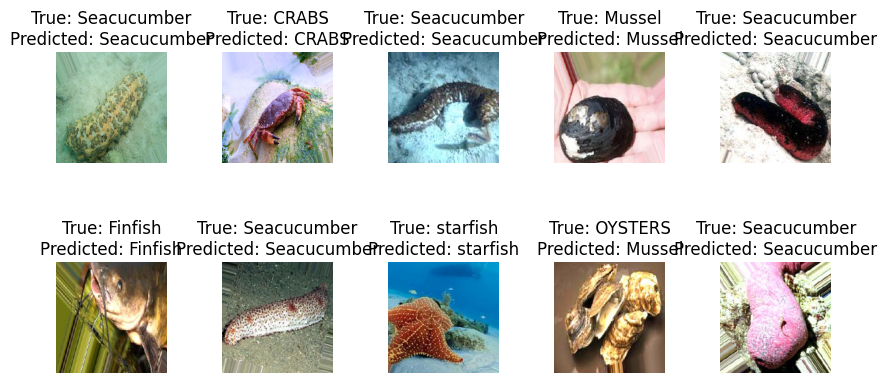

In [ ]:
display_images(x_test[:10], y_test_classes[:10], y_pred_classes[:10])